In [6]:
from qiskit import *
from qiskit import IBMQ
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-06-19 13:28:14,580: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q-education', group='indraprasta-ins-1', project='intro-quantum-co')>

## Gates
- We can either use the visual diagrams or we can use the matrix representations of them

In [19]:
from qiskit.tools.visualization import plot_bloch_multivector,plot_bloch_vector
from qiskit.tools.visualization import plot_histogram # plotting tool
circuit = QuantumCircuit(1,1)
# Applying X gate on the 
circuit.x(0)
sim = Aer.get_backend('statevector_simulator')

In [15]:
# Result is the result that we get after executing the circuit 
# on a classical simulator
#Classical simulator is simulating a perfect quantum device 
result = execute(circuit,backend=sim).result()
stateVector = result.get_statevector()
print("The state vector :",stateVector)

The state vector : [0.+0.j 1.+0.j]


### Circuit Diagram

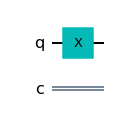

In [16]:
%matplotlib inline
circuit.draw(output='mpl')

### The <B>X</B> Gate on Bloch

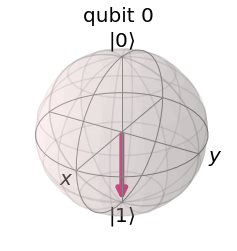

In [21]:
plot_bloch_multivector(stateVector)

### Measurement and Histogramming

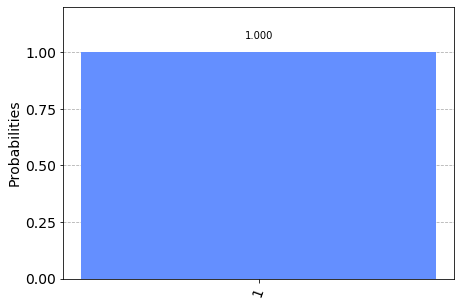

In [4]:
circuit.measure([0],[0]) # measuring the qubit and storing in classical bit
backend = Aer.get_backend('qasm_simulator') # using the quantum simulator
result = execute(circuit,backend = backend,shots=2000).result() # getting the result
counts = result.get_counts() # getting the counts of the values , |0> and |1>
plot_histogram(counts) # plotting it actually, what to plot? The counts ...

## An equal superposition of states
- Applying <b> Hadamard gate </b> to both of the qubits in the circuit 2 gives you an equal superposition of the four possible states

### Bloch sphere

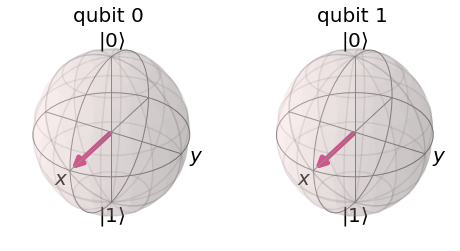

In [22]:
q,c = QuantumRegister(2),ClassicalRegister(2)
circuit_2 = QuantumCircuit(q,c)
circuit_2.h([0,1])
res = execute(circuit_2,backend= sim,shots=1000).result()
SV = res.get_statevector()
plot_bloch_multivector(SV)

### Drawing

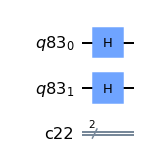

In [50]:
circuit_2.draw(output='mpl')

### Histograms
- Unless we **measure the circuit**, the following is gonna be the histogram.

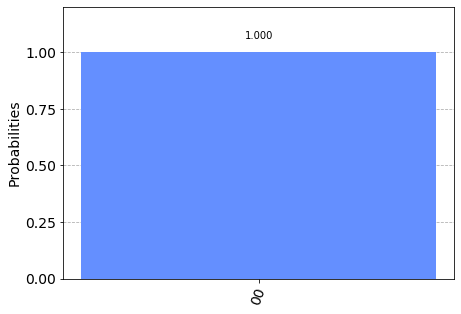

In [51]:
#circuit_2.measure(q,c)
backend = Aer.get_backend(name='qasm_simulator')
res = execute(circuit_2,backend = backend, shots=1000).result()
counts  = res.get_counts()
plot_histogram(counts)

- Here let us **measure and then plot**
- You can see that there are *equal probabilities of measuring the four possible states*

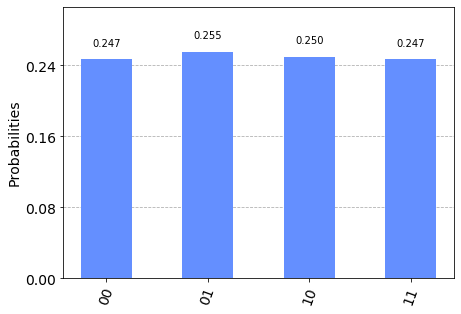

In [52]:
circuit_2.measure(q,c)
backend = Aer.get_backend(name= 'qasm_simulator')
result = execute(circuit_2,backend = backend,shots = 5000).result()
count = result.get_counts()
plot_histogram(count)

## Using $U_{3}$ gates
- Definition is :
$$ U_{3}(\theta,\phi,\lambda) = \begin{bmatrix} cos \frac{\theta}{2} & - e^{i\lambda}sin \frac{\theta}{2} \\
                   e^{i\phi}sin \frac{\theta}{2} & - e^{i(\lambda+\phi)}cos \frac{\theta}{2}
                   \end{bmatrix}$$

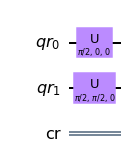

In [43]:
# trying out this gate
qr = QuantumRegister(name='qr',size= 2)
cr = ClassicalRegister(1,name='cr')
q = QuantumCircuit(qr,cr)

# qc.u() -> theta, phi, lambda, qubit index

q.u(np.pi/2,0,0,qr[0])
q.u(np.pi/2,np.pi/2,0,qr[1])
q.draw('mpl')

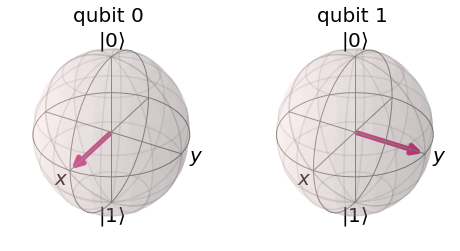

In [44]:
plot_bloch_multivector(execute(q,backend = Aer.get_backend('statevector_simulator')).result().get_statevector())